<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/Katrina/JPMorganPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing

In [196]:
import numpy as np
import pandas as pd
import matplotlib
import yfinance as yf
import os
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly

import pandas_datareader.data as web; yf.pdr_override()

In [197]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector


remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

print(len(symbols))

symbol_industry = dict(zip(symbols,industries))
print(len(symbol_industry))

499
499


In [198]:
# old day 2023-02-02
# old end 2023-03-21
start_date = '2022-01-01'
end_date  = '2022-12-31'

data_dir = '/data/'

In [199]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
    #import in above cell
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates] #strptime takes in date and format

In [200]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.makedirs(data_dir, exist_ok=True)

In [201]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [202]:
df.drop(columns='Volume')

,Adj Close
Date,
2022-01-03,230.225372
2022-01-04,221.460236
2022-01-05,213.039383
2022-01-06,213.885406
2022-01-07,207.658279
...,...
2022-12-23,144.442413
2022-12-27,143.986572
2022-12-28,142.529861


In [203]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes

# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']

In [204]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)

In [205]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03,154.596817,18.750000,179.953873,125.280716,172.679993,134.063431,44.549999,395.446686,564.369995,171.413132,...,87.340065,64.450043,59.097820,55.447815,114.280235,132.103210,123.620811,583.900024,59.537766,230.225372
2022-01-04,149.370483,19.020000,177.669983,125.040184,170.800003,130.910477,45.130001,392.620697,554.000000,169.864944,...,87.061440,64.857948,61.320732,55.730461,115.492546,132.809525,124.874916,587.599976,61.233814,221.460236
2022-01-05,146.811646,18.680000,172.943970,125.697006,162.250000,130.322296,44.599998,385.706390,514.429993,167.242706,...,83.837318,65.493530,62.083412,54.833775,113.918495,131.125977,124.463264,558.179993,61.372837,213.039383
2022-01-06,147.325394,18.570000,170.056976,125.104935,159.750000,130.302994,44.860001,367.080444,514.119995,167.774902,...,84.225403,64.981270,63.543640,54.794800,113.762077,132.480560,123.429329,555.159973,63.893734,213.885406
2022-01-07,143.403168,19.280001,170.225052,124.781136,166.050003,130.707993,45.070000,360.039886,510.700012,163.372238,...,84.135849,65.550438,64.064491,54.970238,112.852837,130.961456,122.682617,530.859985,64.959564,207.658279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.183121,12.710000,131.127075,156.766953,85.250000,106.058311,63.380001,261.928528,338.450012,161.535782,...,80.324608,68.689728,105.091934,31.343016,108.675728,127.117882,125.965240,248.220001,46.140099,144.442413
2022-12-27,148.500885,12.530000,129.307220,156.661209,83.489998,106.440659,63.619999,261.160767,335.089996,159.918839,...,83.916924,69.309517,106.552101,31.579346,109.656204,128.104065,126.551857,251.000000,46.511505,143.986572
2022-12-28,147.051117,12.320000,125.339409,155.930710,82.489998,105.715179,62.599998,259.004944,328.329987,158.025833,...,79.697685,68.810287,104.801842,30.506021,107.893303,127.522232,125.269241,246.839996,45.682983,142.529861
2022-12-29,150.030060,12.700000,128.889557,156.247894,85.230003,108.146538,63.110001,264.182709,337.579987,161.673813,...,80.861961,69.297813,105.594772,31.914906,110.567368,128.192825,127.098709,257.529999,46.740063,146.810791


In [206]:
df_pct = df_price.pct_change()[1:]
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009800,0.012438,-0.016090,-0.013629,-0.012676,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023520,-0.000711,-0.001373,0.010330,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011467,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009239,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001477,0.011943,-0.002798,-0.001041,0.004477,0.001388,0.008433,0.005023,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,0.001106,0.002869,0.003521,0.005034
2022-12-27,0.002144,-0.014162,-0.013879,-0.000675,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044722,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008255,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [207]:
df_pct = df_pct.dropna(how='all')

- current objects i have df, df_price, df_pct

In [208]:
df_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-04,-0.033806,0.014400,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,...,-0.003190,0.006329,0.037614,0.005098,0.010608,0.005347,0.010145,0.006337,0.028487,-0.038072
2022-01-05,-0.017131,-0.017876,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,...,-0.037033,0.009800,0.012438,-0.016090,-0.013629,-0.012676,-0.003297,-0.050068,0.002270,-0.038024
2022-01-06,0.003499,-0.005889,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,...,0.004629,-0.007822,0.023520,-0.000711,-0.001373,0.010330,-0.008307,-0.005410,0.041075,0.003971
2022-01-07,-0.026623,0.038234,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,...,-0.001063,0.008759,0.008197,0.003202,-0.007992,-0.011467,-0.006050,-0.043771,0.016681,-0.029114
2022-01-10,0.000069,-0.025415,0.000116,0.011195,-0.032159,-0.002213,0.021078,0.006069,0.029626,0.009239,...,-0.028149,0.010999,-0.005952,-0.016844,-0.010136,-0.013964,-0.009754,0.008571,-0.007562,0.007153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001477,0.011943,-0.002798,-0.001041,0.004477,0.001388,0.008433,0.005023,0.005735,0.000550,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,0.001106,0.002869,0.003521,0.005034
2022-12-27,0.002144,-0.014162,-0.013879,-0.000675,-0.020645,0.003605,0.003787,-0.002931,-0.009928,-0.010010,...,0.044722,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,-0.030685,-0.004663,-0.011977,-0.006816,-0.016033,-0.008255,-0.020174,-0.011837,...,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117
2022-12-29,0.020258,0.030844,0.028324,0.002034,0.033216,0.022999,0.008147,0.019991,0.028173,0.023085,...,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139,0.030035


In [209]:
# Convert index to datetime if it's in string format
df_pct.index = pd.to_datetime(df_pct.index)

# Create a new DataFrame with the desired structure
new_df = pd.DataFrame(index=[f'{company} Week {week}' for company in df_pct for week in range(1, 53)],
                      columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through rows of the original DataFrame and fill the new DataFrame
for i, row in df_pct.iterrows():
    week = i.week
    day = i.dayofweek

    for column_name in df_pct.columns:
      new_df.at[f'{column_name} Week {week}', f'Day {day + 1}'] = row[column_name]

# Display the new DataFrame
pct = new_df
pct


,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,NaN,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,NaN,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.00189,0.042543,0.016219,0.004979
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020227,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [210]:
pct = pct.fillna(0)

In [211]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.001890,0.042543,0.016219,0.004979
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020227,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


### Begin prediction

In [212]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.001890,0.042543,0.016219,0.004979
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020227,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [213]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
pct_drop = pct

y = pct_drop["Day 5"]
X = pct_drop.drop("Day 5", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize
model = XGBRegressor(objective='reg:squarederror', random_state=1234)
# Train
model.fit(X_train, y_train)
# Create Predictions
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

pred_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
pred_df

Mean Squared Error: 0.0005681026626395656


,Actual Prices,Predicted Prices
CHRW Week 32,-0.001277,0.000213
AXP Week 13,0.000909,-0.000498
WMT Week 48,-0.000978,-0.001905
NEM Week 29,-0.013438,0.001052
BAX Week 47,-0.005329,0.007780
...,...,...
PH Week 4,-0.000389,0.000125
WDC Week 38,0.000591,-0.000010
AON Week 6,-0.013436,-0.006661
URI Week 28,0.013318,-0.000740


#### Graph

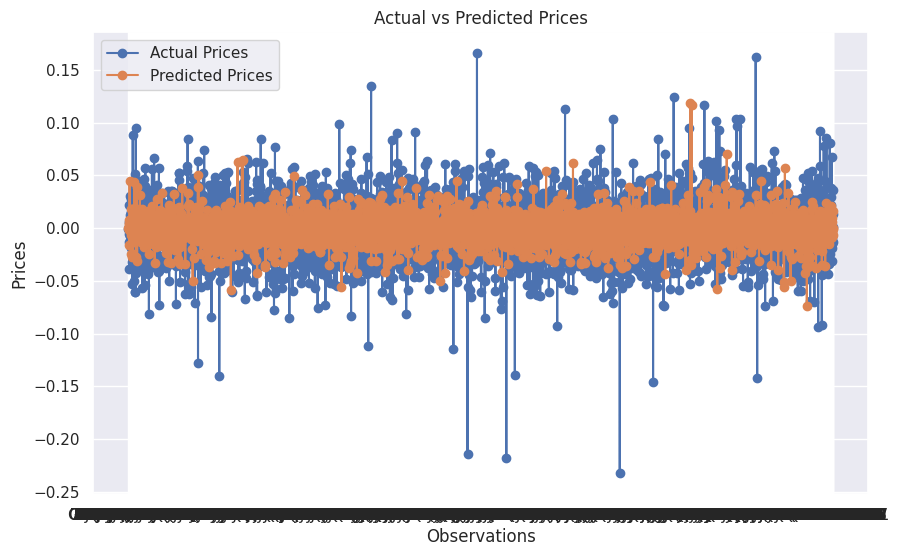

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Plot the actual prices
plt.plot(pred_df['Actual Prices'], label='Actual Prices', marker='o')

# Plot the predicted prices
plt.plot(pred_df['Predicted Prices'], label='Predicted Prices', marker='o')

# Set labels and title
plt.xlabel('Observations')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [215]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.001890,0.042543,0.016219,0.004979
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020227,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [216]:
n = 52
companies = {}

for i in range(0, len(pct), n):
    # Extract 52 rows for the current iteration
    df_iteration = pct.iloc[i:i + n]

    # Get the corresponding symbol for the dataframe
    symbol = symbols[i // n]  # Integer division to get the index of the symbol

    # Add the dataframe to the dictionary with the symbol as the key
    companies[symbol] = df_iteration



In [217]:
companies['A']

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
A Week 6,-0.005315,0.003135,0.025780,-0.019247,-0.031484
A Week 7,-0.014504,0.005177,-0.005592,-0.036256,0.013820
A Week 8,0.000000,-0.011814,-0.034409,0.017063,0.043543
A Week 9,-0.025200,0.012044,0.009323,0.030114,-0.023912
A Week 10,-0.026514,-0.007826,0.030467,0.008029,-0.029926


In [218]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Create a dictionary to store predicted vs actual values
predictions_dict = {}

# Hyperparameters for the XGBoost model (you can adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1
}

# Iterate through the dictionary of dataframes
for symbol, df in companies.items():
    # Assuming your target column is named 'target', adjust as needed
    X_new = df.drop('Day 5', axis=1)
    y_new = df['Day 5']
    X_train_new, X_test_new, y_train_new, y_test_new  = train_test_split(X_new, y_new, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train_new, y_train_new)

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    predictions = model.predict(X_train_new)

    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_train_new, 'Predicted': predictions})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_dict[symbol] = pred_df_new

In [219]:
predictions_dict['AAL']

,Actual,Predicted
AAL Week 22,-0.071019,-0.068498
AAL Week 46,0.007168,0.007714
AAL Week 52,0.001575,0.001613
AAL Week 19,0.070368,0.070089
AAL Week 21,0.051624,0.050276
AAL Week 11,0.012085,0.011776
AAL Week 8,0.029481,0.028412
AAL Week 15,0.000000,-0.000057
AAL Week 18,-0.037756,-0.036681
AAL Week 23,-0.049127,-0.049059


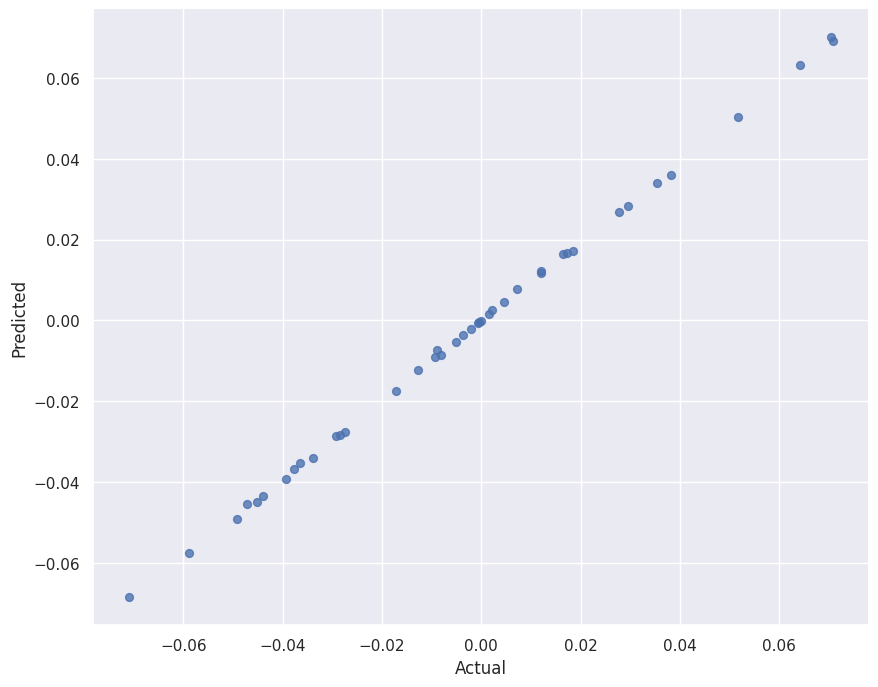

In [220]:
from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

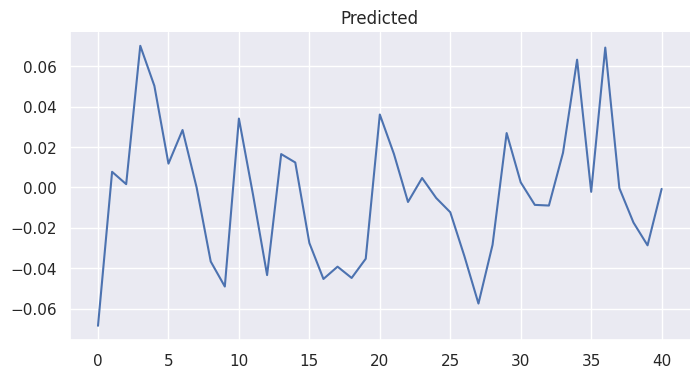

In [221]:
from matplotlib import pyplot as plt
_df_28['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

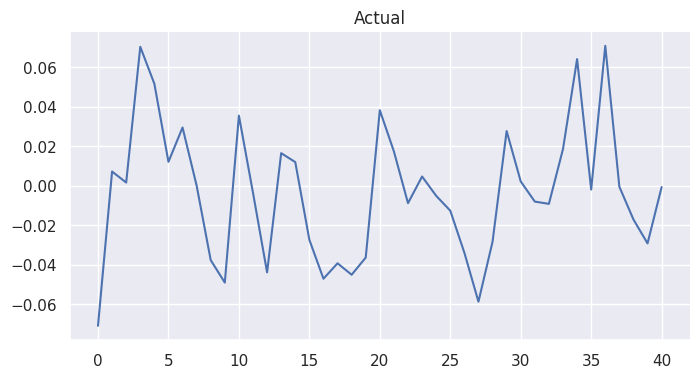

In [222]:
from matplotlib import pyplot as plt
_df_27['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [223]:
predictions_dict['ANET']

,Actual,Predicted
ANET Week 22,-0.027982,-0.027703
ANET Week 46,0.025897,0.025895
ANET Week 52,-0.004349,-0.004128
ANET Week 19,0.068654,0.067582
ANET Week 21,0.020827,0.020432
ANET Week 11,0.041667,0.041442
ANET Week 8,0.021843,0.020569
ANET Week 15,0.000000,-0.000398
ANET Week 18,0.000000,-0.000088
ANET Week 23,-0.035057,-0.034468


### Training Based on Clustering

In [224]:
pct

,Day 1,Day 2,Day 3,Day 4,Day 5
A Week 1,0.000000,-0.033806,-0.017131,0.003499,-0.026623
A Week 2,0.000069,0.010196,0.019572,-0.029028,-0.003375
A Week 3,0.000000,-0.029099,-0.000285,-0.006765,-0.014124
A Week 4,0.004436,-0.025702,-0.007877,-0.010636,0.037626
A Week 5,0.016489,0.012274,0.022761,-0.016986,-0.004725
...,...,...,...,...,...
ZTS Week 48,-0.013125,-0.001890,0.042543,0.016219,0.004979
ZTS Week 49,-0.013277,-0.014678,-0.018295,0.022829,-0.001887
ZTS Week 50,-0.003455,0.013803,-0.020585,-0.020227,-0.028579
ZTS Week 51,-0.008791,-0.005028,0.017197,0.000759,0.005034


In [225]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03,154.596817,18.750000,179.953873,125.280716,172.679993,134.063431,44.549999,395.446686,564.369995,171.413132,...,87.340065,64.450043,59.097820,55.447815,114.280235,132.103210,123.620811,583.900024,59.537766,230.225372
2022-01-04,149.370483,19.020000,177.669983,125.040184,170.800003,130.910477,45.130001,392.620697,554.000000,169.864944,...,87.061440,64.857948,61.320732,55.730461,115.492546,132.809525,124.874916,587.599976,61.233814,221.460236
2022-01-05,146.811646,18.680000,172.943970,125.697006,162.250000,130.322296,44.599998,385.706390,514.429993,167.242706,...,83.837318,65.493530,62.083412,54.833775,113.918495,131.125977,124.463264,558.179993,61.372837,213.039383
2022-01-06,147.325394,18.570000,170.056976,125.104935,159.750000,130.302994,44.860001,367.080444,514.119995,167.774902,...,84.225403,64.981270,63.543640,54.794800,113.762077,132.480560,123.429329,555.159973,63.893734,213.885406
2022-01-07,143.403168,19.280001,170.225052,124.781136,166.050003,130.707993,45.070000,360.039886,510.700012,163.372238,...,84.135849,65.550438,64.064491,54.970238,112.852837,130.961456,122.682617,530.859985,64.959564,207.658279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,148.183121,12.710000,131.127075,156.766953,85.250000,106.058311,63.380001,261.928528,338.450012,161.535782,...,80.324608,68.689728,105.091934,31.343016,108.675728,127.117882,125.965240,248.220001,46.140099,144.442413
2022-12-27,148.500885,12.530000,129.307220,156.661209,83.489998,106.440659,63.619999,261.160767,335.089996,159.918839,...,83.916924,69.309517,106.552101,31.579346,109.656204,128.104065,126.551857,251.000000,46.511505,143.986572
2022-12-28,147.051117,12.320000,125.339409,155.930710,82.489998,105.715179,62.599998,259.004944,328.329987,158.025833,...,79.697685,68.810287,104.801842,30.506021,107.893303,127.522232,125.269241,246.839996,45.682983,142.529861
2022-12-29,150.030060,12.700000,128.889557,156.247894,85.230003,108.146538,63.110001,264.182709,337.579987,161.673813,...,80.861961,69.297813,105.594772,31.914906,110.567368,128.192825,127.098709,257.529999,46.740063,146.810791


In [226]:
df_industry = pd.DataFrame({"Sectors": industries, "Company": symbols})


In [227]:
df_industry

,Sectors,Company
0,Industrials,A
1,Industrials,AAL
2,Health Care,AAPL
3,Health Care,ABBV
4,Information Technology,ABNB
...,...,...
494,Consumer Discretionary,YUM
495,Information Technology,ZBH
496,Health Care,ZBRA
497,Financials,ZION


In [228]:
sectors_to_append = {sector: pd.DataFrame() for sector in df_industry['Sectors'].unique()}

# Iterate through rows to figure out if the sectors match the name
for _, company in df_industry.iterrows():
    company_name = company['Company']
    company_sector = company['Sectors']

    # Check if the company exists in the df_price DataFrame
    if company_name in df_price.columns and company_sector in sectors_to_append:
        sectors_to_append[company_sector][company_name] = df_price[company_name]

In [229]:
sectors_to_append['Communication Services']

,AIZ,AVGO,CMI,CTAS,EBAY,ES,GM,GNRC,JKHY,LYV,...,MOH,NKE,NOW,NRG,OTIS,PEAK,TECH,TER,VRSK,WEC
2022-01-03,151.095963,631.239746,209.328430,415.411591,64.459435,84.064896,60.421680,347.910004,168.009521,121.139999,...,316.570007,161.382080,630.140015,39.773586,83.044640,32.716656,120.985367,164.854797,219.059235,89.995804
2022-01-04,152.517319,638.472229,217.319016,416.410736,62.857597,83.366951,64.935768,332.079987,171.105225,120.720001,...,303.940002,163.067719,603.940002,39.458805,83.675453,33.196571,116.081848,165.122742,219.128418,89.771027
2022-01-05,151.134644,611.902588,216.403656,397.672150,62.230373,84.159218,61.972469,312.089996,169.400620,117.470001,...,302.209991,159.010391,572.760010,38.347816,81.355988,32.598930,107.825012,159.039047,211.795471,90.810631
2022-01-06,150.670547,606.221313,219.493073,394.753174,64.469070,83.847977,62.100883,317.390015,166.148193,119.339996,...,291.769989,157.824539,574.039978,37.625671,82.210007,32.562710,105.793671,162.244659,210.174728,90.239304
2022-01-07,153.484177,589.205994,223.459778,389.287384,63.996258,84.564781,61.508221,316.549988,166.295135,115.860001,...,289.769989,153.835815,566.390015,37.551605,81.870338,32.571766,103.000877,157.074051,204.225342,91.044769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,123.035263,542.620361,236.293518,452.564728,39.492306,81.847137,33.566917,92.190002,175.555267,70.690002,...,335.079987,115.152924,381.859985,30.611338,77.149109,23.779388,82.369179,86.286476,174.763290,92.162750
2022-12-27,122.582603,543.710632,239.065262,454.336395,39.403828,82.566193,33.060886,91.150002,177.099564,69.589996,...,334.369995,116.450554,380.640015,30.927910,77.296799,23.911652,81.851448,84.492165,174.713531,92.674339
2022-12-28,121.982338,535.214355,236.332718,446.428131,39.246529,81.895714,32.277027,96.239998,174.862305,68.160004,...,332.420013,113.894913,376.049988,30.563374,76.203941,23.344803,80.338081,83.973801,173.389923,91.766983
2022-12-29,124.609734,547.904846,236.753845,452.277679,41.114471,82.673088,33.408161,100.639999,175.703766,70.150002,...,333.269989,116.242538,389.850006,31.081396,77.848137,23.807732,84.101585,87.213531,177.201462,92.095184


In [230]:
sectors_to_append['Utilities']

,ACN,AIG,ALK,ALLE,AME,AVY,CLX,CRM,CTVA,CVX,...,NTRS,NXPI,PHM,PM,POOL,PTC,SNPS,STX,WHR,XRAY
2022-01-03,395.446686,55.044086,54.070000,126.245674,141.971252,204.683441,164.167755,255.460007,46.047913,110.761475,...,113.984535,222.986481,54.921616,87.197853,537.966492,122.980003,361.100006,104.939728,211.356262,55.447815
2022-01-04,392.620697,56.588280,55.450001,129.212463,144.362640,209.644958,164.787170,248.229996,46.902103,112.776848,...,118.309715,224.577728,55.724537,87.753471,537.614563,122.599998,352.989990,107.591949,217.505295,55.730461
2022-01-05,385.706390,55.811386,54.770000,126.196877,141.734085,207.761337,166.513977,227.669998,46.381737,113.510559,...,117.507004,216.573273,54.941204,87.398232,517.562500,118.330002,339.769989,106.377121,214.026581,54.833775
2022-01-06,367.080444,56.770512,54.459999,124.986725,143.433762,207.790451,167.555679,229.149994,47.029747,114.476440,...,118.970779,218.878174,53.883698,88.728104,508.900269,117.139999,344.970001,104.216377,212.309967,54.794800
2022-01-07,360.039886,58.257153,55.860001,123.581383,140.696533,207.042831,168.831985,228.309998,47.540291,116.120316,...,122.446030,213.448654,51.190983,90.303917,491.937561,115.080002,330.359985,102.899536,206.215393,54.970238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,261.928528,61.964111,43.310001,103.743423,138.672241,178.714035,139.473404,129.440002,58.890556,170.693298,...,85.605179,155.139694,45.467537,97.644424,301.863312,121.250000,320.209991,48.871906,134.091446,31.343016
2022-12-27,261.160767,62.130898,42.259998,104.681786,139.418457,179.967224,139.599213,130.660004,59.267422,172.838989,...,85.478760,151.312119,45.546970,98.595039,302.268311,120.620003,317.950012,50.371639,134.157730,31.579346
2022-12-28,259.004944,61.699223,41.299999,103.042114,137.657425,176.710876,137.779694,128.470001,58.146744,170.289169,...,84.661896,149.265503,44.573868,96.924271,292.854858,118.870003,315.309998,49.394390,130.995300,30.506021
2022-12-29,264.182709,62.425217,42.810001,105.432472,139.657227,179.019928,137.837784,132.539993,58.493858,171.578537,...,87.015236,155.582458,45.497322,97.164314,303.167206,121.120003,321.980011,51.300507,135.492783,31.914906


In [231]:
for sector, df in sectors_to_append.items():
    # Convert index to datetime if it's in string format
    df.index = pd.to_datetime(df.index)

    # Create a new DataFrame with the desired structure
    new_df = pd.DataFrame(index=[f'{company} Week {week}' for company in df.columns for week in range(1, 53)],
                          columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

    # Iterate through rows of the original DataFrame and fill the new DataFrame
    for m, row in df.iterrows():
        week = m.week
        day = m.dayofweek

        for column_name in df.columns:
            new_df.at[f'{column_name} Week {week}', f'Day {day + 1}'] = row[column_name]
            new_df.fillna(0)
    # Now you can use or save the new_df for each sector as needed
    sectors_to_append[sector] = new_df


In [232]:
sectors_to_append['Health Care']

,Day 1,Day 2,Day 3,Day 4,Day 5
AAPL Week 1,179.953873,177.669983,172.94397,170.056976,170.225052
AAPL Week 2,170.244843,173.102203,173.547089,170.244843,171.114899
AAPL Week 3,NaN,167.881821,164.352142,162.651581,160.575317
AAPL Week 4,159.79425,157.975006,157.886032,157.421341,168.405838
AAPL Week 5,172.805542,172.637497,173.853592,170.946808,170.659714
...,...,...,...,...,...
ZTS Week 48,146.790985,146.513519,152.746674,155.224075,155.997009
ZTS Week 49,153.925903,151.666519,148.891815,152.290817,152.003448
ZTS Week 50,151.478226,153.569153,150.408005,147.365753,143.15416
ZTS Week 51,141.895645,141.182144,143.610016,143.718994,144.442413


In [233]:
# Create a dictionary to store predicted vs actual values
predictions_sectors = {}

# Hyperparameters for the XGBoost model (you can adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1
}

# Iterate through the dictionary of dataframes
for company, df in sectors_to_append.items():
    # Assuming your target column is named 'target', adjust as needed
    X_new = df.drop('Day 5', axis=1)
    y_new = df['Day 5']
    X_train_new, X_test_new, y_train_new, y_test_new  = train_test_split(X_new, y_new, test_size=0.2, random_state=1234)

    # Initialize the XGBoost model
    model = XGBRegressor(**params)

    # Train the model
    model.fit(X_train_new, y_train_new)

    # Make predictions on the same training set for simplicity (you might want to use a test set)
    predictions = model.predict(X_train_new)

    # Create a dataframe to store predicted vs actual values
    pred_df_new = pd.DataFrame({'Actual': y_train_new, 'Predicted': predictions})

    # Add the dataframe to the predictions dictionary with the symbol as the key
    predictions_sectors[company] = pred_df_new

ValueError: ignored